# Inestabilidad de Turing 
Vamos a realizar el analisis del Sistema no espacial donde una formula queda generada de la siguiente manera

$\frac{\partial u}{\partial t}= F(u,p)$ y $\frac{\partial p}{\partial t}= G(u,p)$
Donde 

$F(u,p)= \frac{a_1up}{(u+c_1)(p+c_2)}-[au+(r+su)p]$

$G(u,p)= \alpha p \left(\frac{a_2u}{u^2+c_2^2}-p \right)-\left(\sigma_0\frac{\sigma_1u}{(c_0+u)}\right)p$

## Paquetes

In [ ]:
import numpy as np
import sympy as spp
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

spp.init_printing(use_latex='mathjax')
plt.rcParams['mathtext.fontset'] = 'stix'

## Diagrama de Fase

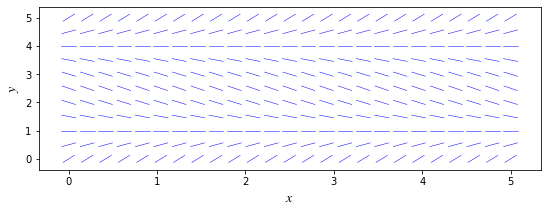

In [ ]:
x = spp.symbols("x"); y = spp.Function("y")
def  plot_direction_field(x, y_x, f_xy, x_lim=(0, 5), y_lim=(0, 5), ax=None):
    f_np = spp.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 25)
    y_vec = np.linspace(y_lim[0], y_lim[1], 11)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')
    ax.set_xlabel(r"$x$", fontsize=14)
    ax.set_ylabel(r"$y$", fontsize=14)
    #ax.set_title(r"$%s$" %
    #            (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
    #            fontsize=18)
    
    return ax

fig, axes = plt.subplots(1, 1, figsize=(9, 3))
plot_direction_field(x, y(x),0.2*(y(x)**2-5*y(x)+4), ax=axes)
#plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
#plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])
#plot_direction_field(x, y(x),(y(x)-1)*(y(x)-3)**2, ax=axes)
plt.show()

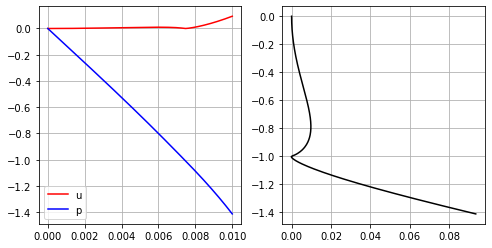

In [ ]:
alpha,o0,o1,a,a1,a2,c0,c1,c2,r,s = 14,130,0.066,15,150,13,1,1,1,7,7.5
def f(xy, t):
    x, y = xy
    return [(a1*x*y)/((x+c1)*(y+c2))-(a*x+(r+s*x)*y),
            alpha*y*((a2*x)/(x**2+c2**2)-y)-(o0-((o1*x)/(c0+x))*y)]
xy0 = [0,0]; t = np.linspace(0,0.01,250)
xy_t = integrate.odeint(f, xy0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="u")
axes[0].plot(t, xy_t[:,1], 'b', label="p")
#axes[0].plot_direction_field(xy_t[:,0], xy_t[:,1], f, ax=axes)
axes[0].set_xlabel(""); axes[0].set_ylabel("")
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel(""); axes[1].set_ylabel("")
axes[0].legend(); axes[0].grid(); axes[1].grid(); plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


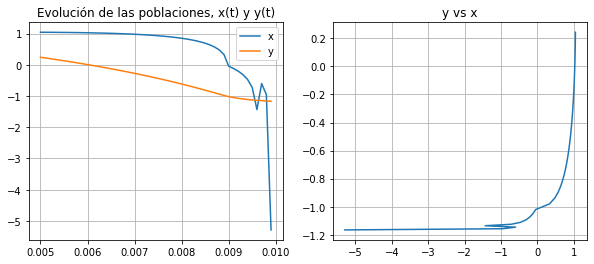

In [ ]:
# Primer punto

alpha,o0,o1,a,a1,a2,c0,c1,c2,r,s = 14,130,0.066,15,150,13,1,1,1,7,7.5
N = 1*(10**5); h = 20/(N-1)
x = np.zeros(N); y = np.zeros(N)
t = np.linspace(0,10,N)
x[0]=1; y[0]=1

for n in range(N-1):
  x[n+1] = x[n] + h*((a1*x[n]*y[n])/((x[n]+c1)*(y[n]+c2))-(a*x[n]+(r+s*x[n])*y[n]))
  y[n+1] = y[n] + h*(alpha*y[n]*((a2*x[n])/(x[n]**2+c2**2)-y[n])-(o0-((o1*x[n])/(c0+x[n]))*y[n]))

fig,axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(t[50:100],x[50:100],label='x'); axes[0].plot(t[50:100],y[50:100],label='y')
axes[0].set_title('Evolución de las poblaciones, x(t) y y(t)')
axes[0].legend(loc=1); axes[0].grid()
axes[1].plot(x[50:100],y[50:100]); 
axes[1].set_title('y vs x')
axes[1].grid()
plt.show()

In [ ]:
pd.DataFrame(x)[0:150]

,0
0,1.000000
1,1.001600
2,1.003190
3,1.004768
4,1.006335
...,...
145,0.574893
146,0.598012
147,0.621292
148,0.644751
